In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time (1).csv to delivery_time (1).csv


In [3]:
data=pd.read_csv('delivery_time (1).csv')

In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [6]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-12-0059e179b935>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


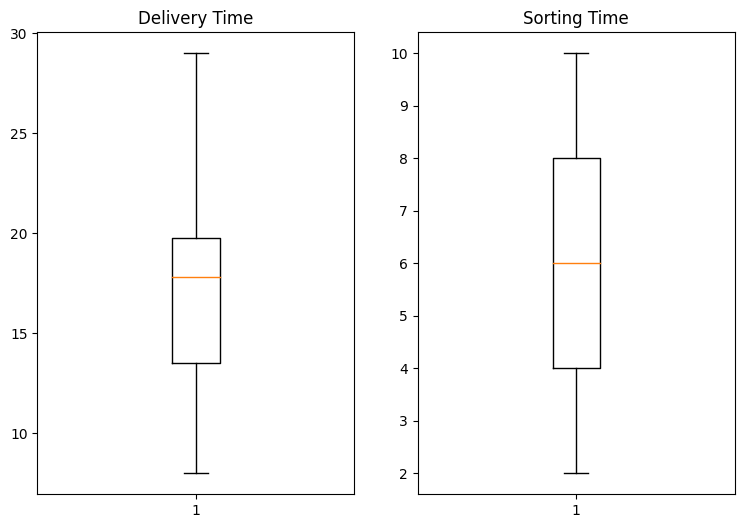

In [12]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(data['delivery_time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(data['sorting_time'])
plt.title('Sorting Time')
plt.show()

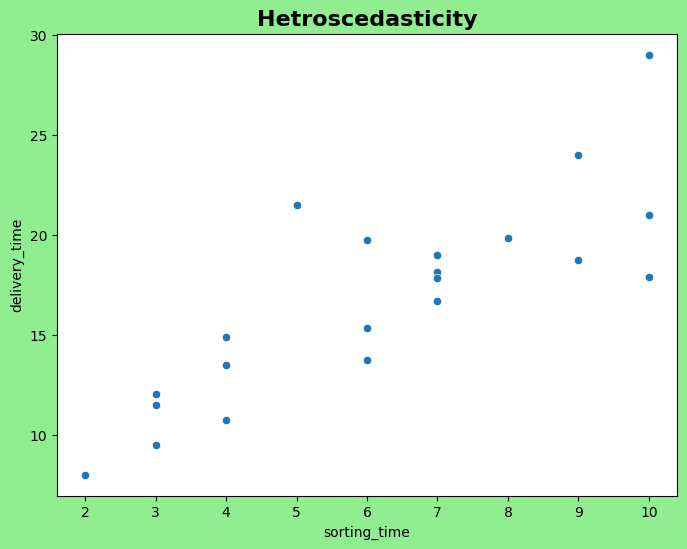

In [14]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = data['sorting_time'], y = data['delivery_time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

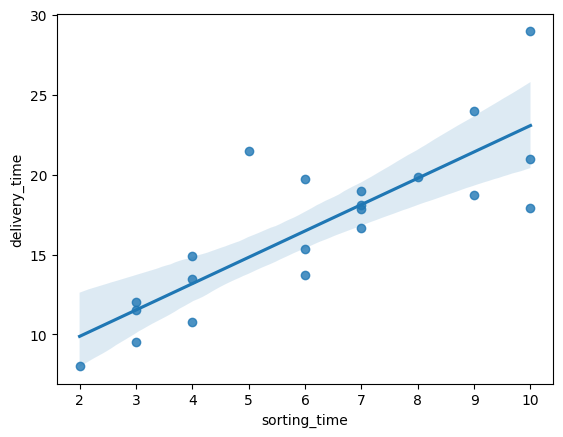

In [15]:
sns.regplot(x='sorting_time',y='delivery_time',data=data);

<ipython-input-16-7935da010ab6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['delivery_time'], bins = 10, kde = True)


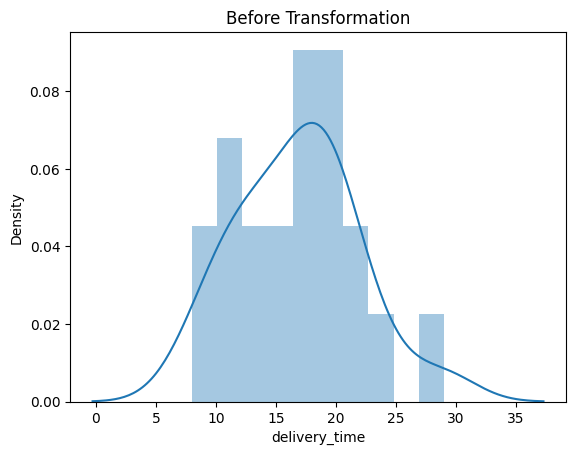

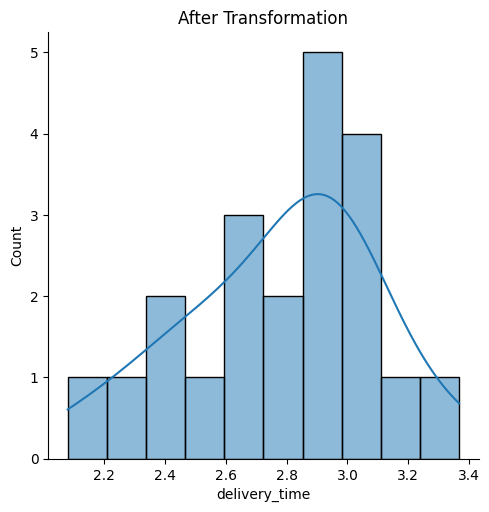

In [16]:
sns.distplot(data['delivery_time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['delivery_time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

<ipython-input-17-9ae11518bb0a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['delivery_time'], bins = 10, kde = True)
<ipython-input-17-9ae11518bb0a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['delivery_time']), bins = 10, kde = True)


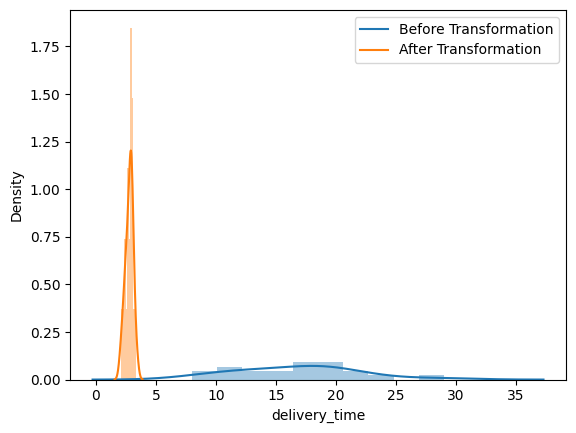

In [17]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['delivery_time'], bins = 10, kde = True)
sns.distplot(np.log(data['delivery_time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

In [19]:
import statsmodels.api as smf

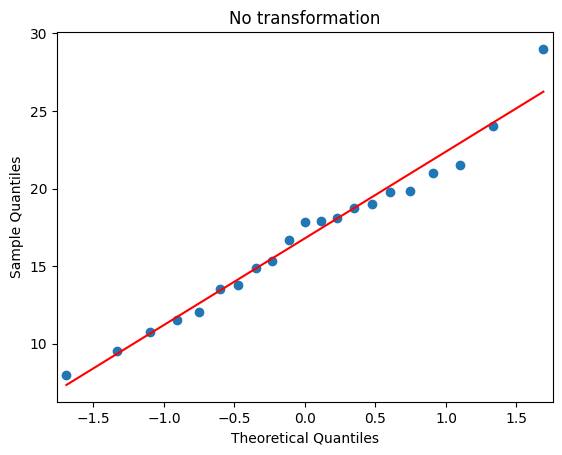

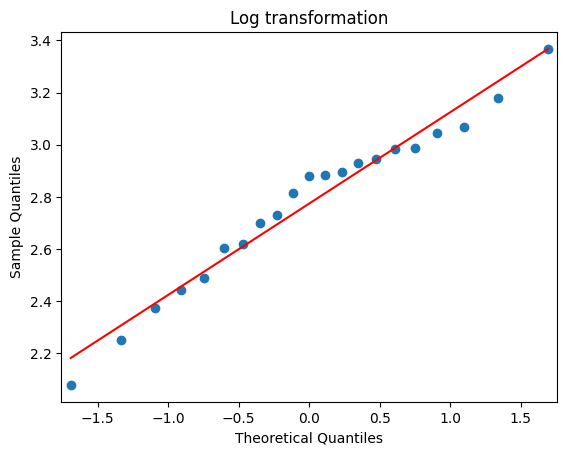

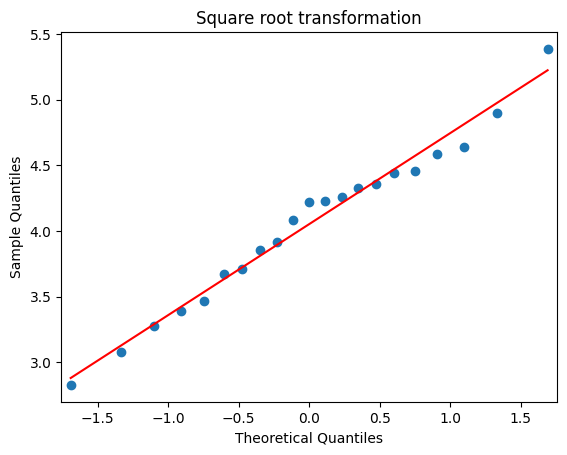

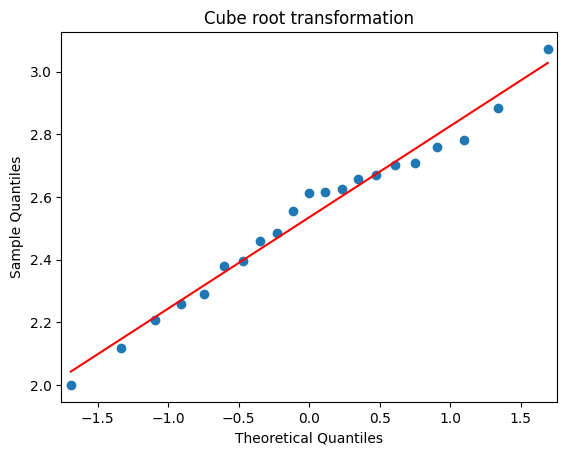

In [21]:
smf.qqplot(data['delivery_time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['delivery_time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['delivery_time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['delivery_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

<ipython-input-22-923e4b77462f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sorting_time'], bins = 10, kde = True)
<ipython-input-22-923e4b77462f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['sorting_time']), bins = 10, kde = True)


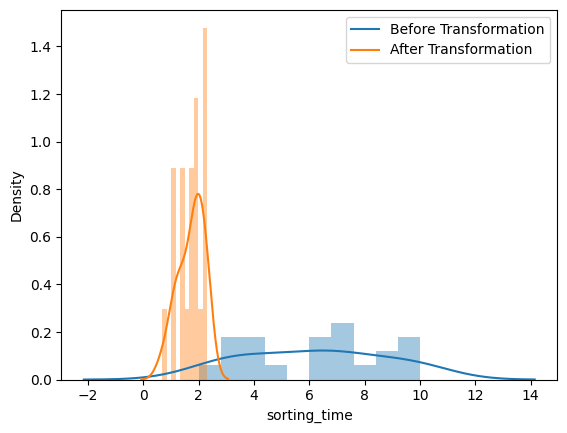

In [22]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['sorting_time'], bins = 10, kde = True)
sns.distplot(np.log(data['sorting_time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

# New Section

In [23]:
import statsmodels.formula.api as smf
model=smf.ols('delivery_time ~ sorting_time',data=data).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           3.98e-06
Time:                        07:04:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [27]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [30]:
model1 = smf.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Fri, 12 Apr 2024   Prob (F-statistic):           8.48e-07
Time:                            07:06:57   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model1.params

Intercept                1.613479
np.sqrt(sorting_time)    1.002217
dtype: float64

In [32]:
(model1.rsquared,model1.rsquared_adj)

(0.7292011987544665, 0.7149486302678596)

In [33]:
model2 = smf.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Fri, 12 Apr 2024   Prob (F-statistic):           4.90e-07
Time:                            07:08:18   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model2.params

Intercept                1.013571
np.cbrt(sorting_time)    0.845585
dtype: float64

In [35]:
(model2.rsquared,model2.rsquared_adj)

(0.7441167577566266, 0.7306492186911859)

In [37]:
model3 = smf.ols('np.log(delivery_time)~np.log(sorting_time)', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 12 Apr 2024   Prob (F-statistic):           1.60e-07
Time:                           07:09:23   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model3.params

Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64

In [39]:
(model3.rsquared,model3.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [41]:
model4 = smf.ols("delivery_time~np.sqrt(sorting_time)",data = data).fit()

In [42]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           2.61e-06
Time:                        07:13:51   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model4.params

Intercept               -2.518837
np.sqrt(sorting_time)    7.936591
dtype: float64

In [44]:
(model4.rsquared,model4.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

The best model will be Model3



In [46]:

from sklearn.metrics import mean_squared_error

In [52]:
model1_pred_y =np.square(model1.predict(data['sorting_time']))
model2_pred_y =np.cbrt(model2.predict(data['sorting_time']))
model3_pred_y =np.exp(model3.predict(data['sorting_time']))

In [53]:
model1_rmse =np.sqrt(mean_squared_error(data['delivery_time'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(data['delivery_time'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(data['delivery_time'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 2.934903768890139 
model1= 2.762294279320867 
model2= 16.193786234813764 
model3= 2.745828897614548


In [54]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model2'

In [65]:
model2.predict()

array([2.83532857, 2.35585357, 2.55010091, 2.77245861, 2.83532857,
       2.55010091, 2.63111689, 2.23311569, 2.83532857, 2.77245861,
       2.70474095, 2.35585357, 2.63111689, 2.23311569, 2.23311569,
       2.35585357, 2.55010091, 2.63111689, 2.07894148, 2.63111689,
       2.45950103])